In [1]:
# Notes on the numerical solution of DEs

# Example 2: Two coupled odes ;  Initial Value Problem (IVP); 
# This script illustrates the basic numerical integration of a problem involving coupled growth and decay
# A solution is marched forward in time from an initial condition defined at time t = 0.
# As with the single ODE example, a critical issue in problems like this is the choice of time step: the step must be sufficiently small to resolve the structure of the solution Y(t).
# A CASE structure is used so that different choices of time step might be investigated easily. Please compare the results.
# Is the "best" choice of time step always the smallet one possible?  How might you define "best" in a practical sense?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#decay constant
Lambda = 0.75 #note: capital 'L' used because 'lambda' is a built-in python function already

#initial Y
y0 = 1

#initial time
t0 = 0

#max integration time
tmax = 10

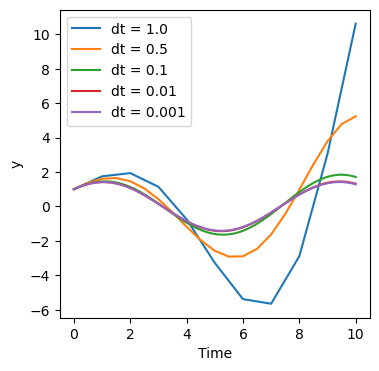

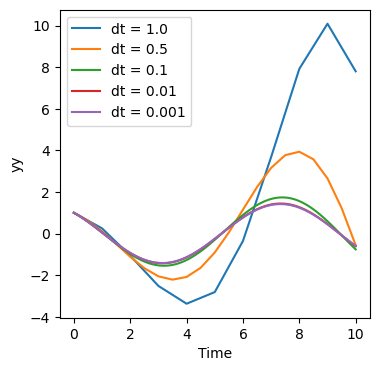

In [3]:
#recursion relation for radioactive decay: y_n+1 = y_n - Lambda*y_n*delta

#investigate influence of time step on solution
dts = [1.0, 0.5, 0.1, 0.01, 0.001] #time steps to investigate

fig1, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4))
fig2, ax2 = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4))

for jj, dt in enumerate(dts): #jj tracks index, dt is the time step of each loop
    
    #initialize
    steps = int(np.round(tmax/dt))
    y = np.empty((steps+1,))
    yy = np.empty((steps+1,))
    t = np.empty((steps+1,))
    y[0] = y0
    yy[0] = y0
    t[0] = t0
    
    #march forward in time
    for step in range(steps):
        y[step+1] = y[step] + yy[step]*Lambda*dt
        yy[step+1] = yy[step] - y[step]*Lambda*dt
        t[step+1] = t[step] + dt  
        
    ax1.plot(t,y,  label = 'dt = ' + str(dt))
    ax2.plot(t,yy, label = 'dt = ' + str(dt))
    
ax1.set_xlabel('Time')
ax1.set_ylabel('y')
ax1.legend()

ax2.set_xlabel('Time')
ax2.set_ylabel('yy')
ax2.legend()

plt.show()